`polars`는 `pandas` 대비 5~10배 빠른 병렬 처리와 낮은 메모리 사용(2~4배)이 강점입니다. 게다가 무엇보다도 문법이 직관적이라 기존 `pandas` 문법보다 기억하기 좋습니다.

> 물론 가장 인상 깊었던 문법은 `R`언어의 `tidyverse` 경험입니다.

## 데이터셋 설명

예시로 살펴볼 데이터셋은 2016년 9월~2017년 9월 사이 뉴욕시 부동산 매매 내역 CSV 파일(nyc_real_estate.csv)입니다. 데이터셋의 한 행은 한 건의 매매를 의미하며 21개의 컬럼 BOROUGH, NEIGHBORHOOD, SALE PRICE, SALE DATE등등이 있습니다. 각각의 컬럼에는 부동산 위치·단위 수·면적·매매가·매매일 등의 정보를 담고 있습니다.

## 데이터 불러오기

먼저 데이터를 불러오겠습니다.

In [ ]:
import polars as pl

# CSV 파일 읽기
df = pl.read_csv("../data/nyc_real_estate.csv")

# 컬럼 이름 확인
df.columns

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

##  크기·행/열·셀 수 확인

우리가 어떤 데이터셋을 확인할 때 가장 먼저 알아야 하는 것은 데이터셋의 크기입니다. `polars` 에서는 pandas와 동일하게 `shape` 속성을 이용해 행과 열의 크기를 확인할 수 있습니다.

In [ ]:
# (행, 열) 형태
print(df.shape)  # (84548, 21)과 유사한 튜플 출력

# 행 수
n_rows = df.shape[0]
print("행 수:", n_rows)

# 열 수
n_cols = df.shape
print("열 수:", n_cols)

# 전체 셀 수
size = n_rows * n_cols
print("전체 셀 수:", size)

(84548, 21)
행 수: 84548
열 수: 21
전체 셀 수: 1775508


##  데이터셋 살펴보기

이제 데이터가 어떤 모습인지 감을 잡기 위해 살짝 들여다보겠습니다👀. 데이터를 살펴볼 때 사용할 수 있는 메서드는 3가지가 있습니다.

* `.head()`: 처음 x개의 행을 보여줍니다.
* `.tail()`: 마지막 x개의 행을 보여줍니다.
* `.sample()`: 임의의 x개의 행을 보여줍니다.

귀찮다면 단순히 `df`를 출력하면 데이터프레임의 처음 5행과 마지막 5행이 출력됩니다.

In [3]:
# 처음 5행 (기본)
df.head()

BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
i64,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64,i64,str,str,str
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2A""",392,6,""" ""","""C2""","""153 AVENUE B""",""" """,10009,5,0,5,"""1633""","""6440""",1900,2,"""C2""","""6625000""","""2017-07-19 00:00:00"""
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2""",399,26,""" ""","""C7""","""234 EAST 4TH STREET""",""" """,10009,28,3,31,"""4616""","""18690""",1900,2,"""C7""",""" - ""","""2016-12-14 00:00:00"""
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2""",399,39,""" ""","""C7""","""197 EAST 3RD STREET""",""" """,10009,16,1,17,"""2212""","""7803""",1900,2,"""C7""",""" - ""","""2016-12-09 00:00:00"""
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2B""",402,21,""" ""","""C4""","""154 EAST 7TH STREET""",""" """,10009,10,0,10,"""2272""","""6794""",1913,2,"""C4""","""3936272""","""2016-09-23 00:00:00"""
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2A""",404,55,""" ""","""C2""","""301 EAST 10TH STREET""",""" """,10009,6,0,6,"""2369""","""4615""",1900,2,"""C2""","""8000000""","""2016-11-17 00:00:00"""


In [4]:
# 마지막 n행
df.tail(2)

BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
i64,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64,i64,str,str,str
5,"""WOODROW""","""22 STORE BUILDINGS …","""4""",7100,28,""" ""","""K6""","""2730 ARTHUR KILL ROAD""",""" """,10309,0,7,7,"""208033""","""64117""",2001,4,"""K6""","""11693337""","""2016-12-21 00:00:00"""
5,"""WOODROW""","""35 INDOOR PUBLIC AND CULTURAL …","""4""",7105,679,""" ""","""P9""","""155 CLAY PIT ROAD""",""" """,10309,0,1,1,"""10796""","""2400""",2006,4,"""P9""","""69300""","""2016-10-27 00:00:00"""


In [5]:
# 랜덤 샘플 n행
df.sample(5)

BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
i64,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64,i64,str,str,str
4,"""ROCKAWAY PARK""","""03 THREE FAMILY DWELLINGS …","""1""",16218,27,""" ""","""C0""","""215 BEACH 122 STREET""",""" """,11694,3,0,3,"""8000""","""3100""",1984,1,"""C0""",""" - ""","""2017-01-20 00:00:00"""
4,"""JACKSON HEIGHTS""","""13 CONDOS - ELEVATOR APARTMENT…","""2""",1263,1030,""" ""","""R4""","""76-15 35TH AVENUE""","""2-O""",11372,1,0,1,""" - """,""" - """,0,2,"""R4""","""545000""","""2016-11-30 00:00:00"""
1,"""GREENWICH VILLAGE-WEST""","""10 COOPS - ELEVATOR APARTMENTS…","""2""",640,12,""" ""","""D0""","""380 WEST 12TH STREET, 6B""",""" """,10014,0,0,0,""" - """,""" - """,1939,2,"""D0""",""" - ""","""2016-12-07 00:00:00"""
4,"""GLENDALE""","""10 COOPS - ELEVATOR APARTMENTS…","""2""",3907,975,""" ""","""D4""","""83-85 WOODHAVEN BLVD, 2S""",""" """,11421,0,0,0,""" - """,""" - """,1954,2,"""D4""","""190000""","""2017-01-26 00:00:00"""
1,"""HARLEM-CENTRAL""","""07 RENTALS - WALKUP APARTMENTS…","""2B""",1937,148,""" ""","""C5""","""242 WEST 132 STREET""",""" """,10027,7,0,7,"""1682""","""2561""",1910,2,"""C5""","""530000""","""2017-03-23 00:00:00"""


##  결측치·자료형 확인

주어진 데이터셋의 결측값을 확인하는 방법은 아래와 같습니다.

In [6]:
# 각 컬럼별 결측치 개수
null_counts_df = df.null_count()
null_counts = null_counts_df.to_dicts()[0]  # 단일 행을 딕셔너리로 변환

print("각 컬럼별 결측치 개수:")
for col, cnt in null_counts.items():
    print(f"{col}: {cnt}")

각 컬럼별 결측치 개수:
BOROUGH: 0
NEIGHBORHOOD: 0
BUILDING CLASS CATEGORY: 0
TAX CLASS AT PRESENT: 0
BLOCK: 0
LOT: 0
EASE-MENT: 0
BUILDING CLASS AT PRESENT: 0
ADDRESS: 0
APARTMENT NUMBER: 0
ZIP CODE: 0
RESIDENTIAL UNITS: 0
COMMERCIAL UNITS: 0
TOTAL UNITS: 0
LAND SQUARE FEET: 0
GROSS SQUARE FEET: 0
YEAR BUILT: 0
TAX CLASS AT TIME OF SALE: 0
BUILDING CLASS AT TIME OF SALE: 0
SALE PRICE: 0
SALE DATE: 0


결과를 통해 우리 데이터셋에는 결측값이 없다는 것을 알 수 있습니다👍.

# 데이터 정제

데이터 정제는 데이터 과학 파이프라인에서 가장 중요한 동시에 가장 시간이 많이 드는 단계 중 하나입니다. 뉴욕 타임즈의 2014년도 기사에 의하면 데이터 과학자는 작업 시간의 80%를 데이터를 정리하는데 쓴다고 했습니다.

데이터 수집 방식이 발전하면서 이 비율은 기사 발행 당시보다는 조금 낮아졌을 가능성이 있습니다. 그럼에도 불구하고 데이터 정제는 데이터 분석을 진행하기 전에 반드시 처리해야 하는 매우 중요한 과정입니다.

왜냐하면 정제 되지 않은 데이터를 통해 분석한 결과는 오해의 소지가 있을 수 있기 때문입니다. 따라서 학습 모델을 만드는 데 많은 시간을 쓰고 미세 조정을 하기 전에 가장 길면서도 가장 중요한 **데이터 정제**를 시작해 봅시다🧹🗑️.

## 컬럼 이름 정리하기

처음 NYC 부동산 데이터셋을 불러왔을 때 가장 먼저 눈에 띈 것 중 하나는 컬럼 이름이었습니다. 컬럼 이름은 모두 대문자이고 단어 사이에 공백이 있습니다. 이런 형식은 분석 시 컬럼 이름을 자주 호출해야 하기 때문에 대소문자와 공백을 매번 신경 써야 해서 그다지 좋은 이름이 아닙니다.

컬럼 이름에 대한 이상적인 형식은 다음과 같습니다.
- 소문자(lowercase)
- 스네이크케이스(snakecase, 공백을 `_` 밑줄로 대체한 형식)

데이터셋의 한 컬럼을 예로 들어 설명하자면 현재 컬럼 이름은 다음과 같이 되어 있습니다. `BUILDING CLASS CATEGORY` 🤮 이상적인 형식은 다음과 같을 것입니다. `building_class_category` 😇

이런 변환을 수행하는 함수를 하나 작성하겠습니다. 먼저 `BUILDING CLASS CATEGORY` 예시부터 시작해 봅시다.

In [7]:
original = "BUILDING CLASS CATEGORY"


# 1) 컬럼 이름을 소문자로 만들고 공백을 밑줄로 바꾸는 함수
def clean_column_name(column: str) -> str:
    return column.lower().replace(" ", "_")


clean_column_name(original)
# 'building_class_category'

'building_class_category'

이제 이 함수를 **모든** 컬럼 이름에 적용하려면, 각 컬럼 이름에 대해 `clean_column_name()`을 적용해 새로운 컬럼 이름 리스트를 만든 뒤 `with_columns` 또는 `rename`에 넘겨주면 됩니다.

In [8]:
# df: pl.DataFrame

# 딕셔너리 버전 (원래 이름 -> 새 이름)
column_dict = {c: clean_column_name(c) for c in df.columns}

# 1) rename 사용
df = df.rename(column_dict)

# 2) 또는 리스트로 한 번에 지정
# new_cols = [clean_column_name(c) for c in df.columns]
# df = df.with_columns(df.columns).rename({old: new for old, new in zip(df.columns, new_cols)})

df.head()

borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
i64,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64,i64,str,str,str
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2A""",392,6,""" ""","""C2""","""153 AVENUE B""",""" """,10009,5,0,5,"""1633""","""6440""",1900,2,"""C2""","""6625000""","""2017-07-19 00:00:00"""
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2""",399,26,""" ""","""C7""","""234 EAST 4TH STREET""",""" """,10009,28,3,31,"""4616""","""18690""",1900,2,"""C7""",""" - ""","""2016-12-14 00:00:00"""
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2""",399,39,""" ""","""C7""","""197 EAST 3RD STREET""",""" """,10009,16,1,17,"""2212""","""7803""",1900,2,"""C7""",""" - ""","""2016-12-09 00:00:00"""
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2B""",402,21,""" ""","""C4""","""154 EAST 7TH STREET""",""" """,10009,10,0,10,"""2272""","""6794""",1913,2,"""C4""","""3936272""","""2016-09-23 00:00:00"""
1,"""ALPHABET CITY""","""07 RENTALS - WALKUP APARTMENTS…","""2A""",404,55,""" ""","""C2""","""301 EAST 10TH STREET""",""" """,10009,6,0,6,"""2369""","""4615""",1900,2,"""C2""","""8000000""","""2016-11-17 00:00:00"""


위 코드는 원래 컬럼 이름(예: `BUILDING CLASS CATEGORY`)을 새 이름(예: `building_class_category`)으로 바꾸어 저장합니다. 컬럼들이 이제 정말 깔끔해 보이네요!🎉

## 컬럼 삭제하기  

우리 데이터셋에는 21개의 컬럼이 있지만 분석에 모두 사용할 필요는 없습니다. 예를 들어, 이번 분석에서 다음 컬럼들은 크게 중요하지 않습니다.

- `ease-ment`  
- `lot`  
- `block`  
- `tax_class_at_time_of_sale`  
- `tax_class_at_present`

따라서 이 컬럼들은 데이터프레임에서 제거 하겠습니다. `polars` 에서는 `select` 또는 `drop`을 이용해 제거할 수 있는데 여기서는 이름으로 명시적으로 지우는 방식을 사용해 보겠습니다.


In [9]:
# 제거할 컬럼 목록
columns_to_remove = [
    "ease-ment",
    "lot",
    "block",
    "tax_class_at_present",
    "tax_class_at_time_of_sale",
]

# 방법 1: drop 사용
df = df.drop(columns_to_remove)

# 방법 2: 필요한 컬럼만 선택 (참고용)
# df = df.select([c for c in df.columns if c not in columns_to_remove])

# 현재 컬럼 수 확인
print(df.shape)  # (84548, 16) 과 유사한 결과 기대

(84548, 16)


현재 컬럼 수 확인 결과를 보면 데이터프레임이 21개 컬럼에서 16개 컬럼으로 줄어든 것을 볼 수 있습니다.

> 중요  
방법2 코드는 필요 없는 5개의 컬럼을 제거한 새 데이터프레임을 덮어쓰고 있습니다. 이미 컬럼을 삭제한 뒤에 이 코드를 다시 실행하면, 해당 컬럼들이 더 이상 존재하지 않기 때문에 에러가 발생합니다. 따라서 같은 컬럼을 두 번 이상 삭제하지 않도록 주의해야 합니다. 

## 컬럼 자료형 고치기  

데이터프레임을 처음 불러올 때 컬럼의 자료형이 제대로 로딩되지 않는 경우가 자주 있습니다.
예를 들어, 숫자형 컬럼이 정수나 실수 대신 문자열을 의미하는 `object` 로 로딩되거나, 날짜·시간 컬럼이 기본적으로 문자열(object)로 로딩되기 때문에, 적절한 자료형으로 직접 변환해 주어야 합니다.

자료형을 고치기 전에, 사용할 수 있는 대표적인 자료형들을 간단히 정리해 보겠습니다.

* `int64`: 정수(소수점 없는 숫자) 자료형  
* `float64`: 실수(소수점이 있는 숫자) 자료형  
* `bool`: 참/거짓(boolean) 자료형  
* `object`: 문자열이거나, 서로 다른 자료형이 섞여 있을 때 사용하는 포괄적인 자료형 (예: 문자열 + 정수 섞여 있는 경우)

현재 데이터프레임의 자료형을 대략 확인해 보면 다음과 같습니다.

In [10]:
df.schema

Schema([('borough', Int64),
        ('neighborhood', String),
        ('building_class_category', String),
        ('building_class_at_present', String),
        ('address', String),
        ('apartment_number', String),
        ('zip_code', Int64),
        ('residential_units', Int64),
        ('commercial_units', Int64),
        ('total_units', Int64),
        ('land_square_feet', String),
        ('gross_square_feet', String),
        ('year_built', Int64),
        ('building_class_at_time_of_sale', String),
        ('sale_price', String),
        ('sale_date', String)])

이 중에서 `"String"`로 표시되어 있지만 실제로는 정수나 실수가 될 수 있는 컬럼이 몇 개 보입니다.

* `land_square_feet`  
* `gross_square_feet`  
* `sale_price`  

보통 `polars` 가 자동으로 데이터형을 변환해주지만 이런 것은 오류가 있어서 수동으로 바꿔줘야 합니다. 예를 들어 `sale_price` 컬럼에 `' -  '` 같은 값이 섞여 있어서 float으로 바로 변환할 수 없습니다. 따라서 먼저 이런 특이한 문자열을 결측값을 의미하는 `None`으로 바꿔주는 처리가 필요합니다.

In [11]:
cols_to_fix = ["sale_price", "land_square_feet", "gross_square_feet"]

for col in cols_to_fix:
    df = df.with_columns(
        pl.when(pl.col(col) == " -  ").then(None).otherwise(pl.col(col)).alias(col)
    ).with_columns(pl.col(col).cast(pl.Float64))

df.schema

Schema([('borough', Int64),
        ('neighborhood', String),
        ('building_class_category', String),
        ('building_class_at_present', String),
        ('address', String),
        ('apartment_number', String),
        ('zip_code', Int64),
        ('residential_units', Int64),
        ('commercial_units', Int64),
        ('total_units', Int64),
        ('land_square_feet', Float64),
        ('gross_square_feet', Float64),
        ('year_built', Int64),
        ('building_class_at_time_of_sale', String),
        ('sale_price', Float64),
        ('sale_date', String)])

이렇게 `' -  '`라는 이상한 하이픈 문자열을 제거(결측값으로 치환)한 뒤에야 해당 컬럼들을 `float` 자료형으로 안전하게 변환된 것을 확인 할 수 있습니다.

### 날짜 컬럼 `sale_date`를 datetime으로 변환

`polars` 에서는 `pl.str.to_datetime()`를 사용해 문자열을 datetime으로 변환합니다.

In [12]:
# 형식이 'YYYY-MM-DD HH:MM:SS' 인 경우
df = df.with_columns(pl.col("sale_date").str.to_datetime(format="%Y-%m-%d %H:%M:%S", strict=False))

print(df["sale_date"].dtype)

Datetime(time_unit='us', time_zone=None)


* 포맷이 `2017-03-09 00:00:00`처럼 시간까지 포함된 형태라면 위와 같이 `%Y-%m-%d %H:%M:%S`를 사용합니다.
* 포맷이 `YYYY-MM-DD`만 있다면 `format="%Y-%m-%d"`로 바꿔 사용하면 됩니다.

이 과정을 거치면 `sale_price`, `land_square_feet`, `gross_square_feet`는 실수형으로, `sale_date`는 datetime 자료형으로 올바르게 변환됩니다.

## 결측값 다루기  

앞서 데이터에 결측값이 없다고 생각했던 것 기억나나요? 이제 데이터를 정제하고 나니 상황이 달라졌습니다.다음 컬럼들에 결측값이 있다는 것을 알 수 있습니다.

- `sale_price`  
- `land_square_feet`  
- `gross_square_feet`  

이제 각 컬럼에 결측값이 얼마나 있는지 다시 살펴보겠습니다.

데이터프레임의 각 컬럼마다 결측값이 몇 개 있는지 알고 싶다면 다음과 같이 계산할 수 있습니다.

In [13]:
# 각 컬럼별 결측치 개수
null_counts_df = df.null_count()
null_counts = null_counts_df.to_dicts()[0]  # 단일 행을 딕셔너리로 변환

n_rows = df.height  # 전체 행 수

print("각 컬럼별 결측치 개수 및 비율(%):")
for col, cnt in null_counts.items():
    pct = (cnt / n_rows) * 100
    print(f"{col}: {cnt}개 ({pct:.2f}%)")

각 컬럼별 결측치 개수 및 비율(%):
borough: 0개 (0.00%)
neighborhood: 0개 (0.00%)
building_class_category: 0개 (0.00%)
building_class_at_present: 0개 (0.00%)
address: 0개 (0.00%)
apartment_number: 0개 (0.00%)
zip_code: 0개 (0.00%)
residential_units: 0개 (0.00%)
commercial_units: 0개 (0.00%)
total_units: 0개 (0.00%)
land_square_feet: 26252개 (31.05%)
gross_square_feet: 27612개 (32.66%)
year_built: 0개 (0.00%)
building_class_at_time_of_sale: 0개 (0.00%)
sale_price: 14561개 (17.22%)
sale_date: 0개 (0.00%)


우와! 면적(square footage) 관련 컬럼들이 `sale_price` 컬럼보다 훨씬 더 많은 결측값을 가지고 있는 것을 알 수 있습니다. 각 컬럼별로 전체 행 개수 대비 몇 퍼센트가 결측인지도 계산해 보니, 면적 정보(`land_square_feet`, `gross_square_feet`)는 30%가 넘는 부동산에서 빠져 있고, `sale_price`는 약 17%가 결측입니다.

`sale_price`가 결측인 행은 분석 대상에서 제외하고 싶다면 다음과 같이 해당 행들을 제거할 수 있습니다.

In [14]:
# 드롭 이전 shape
before_rows, before_cols = df.shape
print(f"드롭 이전: {before_rows}행, {before_cols}열")

# sale_price가 null이 아닌 행만 유지
df = df.filter(pl.col("sale_price").is_not_null())

# 드롭 이후 shape
after_rows, after_cols = df.shape
print(f"드롭 이후: {after_rows}행, {after_cols}열")
print(f"제거된 행 수: {before_rows - after_rows}")

드롭 이전: 84548행, 16열
드롭 이후: 69987행, 16열
제거된 행 수: 14561


## 데이터 부분 선택

이제 컬럼 이름과 자료형을 알맞게 정리했으니, 각 데이터 값이 **말이 되는지** 확인하기 위해 데이터 탐색(EDA)을 시작할 수 있습니다. 

만약 포함된 값이 비현실적이라면 합리적인 범위에 들어오는 값만 남기도록 데이터프레임을 부분 선택(서브셋)할 수 있는데, 이 과정을 데이터 서브셋팅이라고 부릅니다.

이 작업은 과학이라기보다는 예술에 가까운 면이 있어서, 무엇이 말이 되는 값인지 판단하려면 도메인 지식이 조금 필요합니다. 이제 이 데이터프레임에 그 방법을 적용해 보겠습니다.

여기서는 `year_built` 컬럼에 집중해 값들이 타당한지 확인해 보겠습니다. 

* 한 자료에 따르면 뉴욕에서 가장 오래된 건물은 1650년대에 지어졌다고 하므로, 그 이전 연도인 건물들은 잘못된 값일 가능성이 큽니다.(도메인 지식)
* 데이터셋에서 `year_built`의 최솟값을 구해 보면 다음과 같습니다.

In [15]:
# year_built의 최소값 확인
min_year = df.select(pl.col("year_built").min()).item()
print("최소 year_built:", min_year)

최소 year_built: 0


연도가 "0"이라니 전혀 말이 되지 않습니다. 이 값을 제거하기 위해, `year_built`가 1650보다 큰 행만 남기는 데이터 서브셋을 만들겠습니다. 불리언 비교 연산을 사용해 쉽게 할 수 있습니다.

In [16]:
# year_built > 1650인 행만 남긴 서브셋 생성
df_filtered = df.filter(pl.col("year_built") > 1650)

# 필터링 후 행 수 확인
n_original = df.height
n_filtered = df_filtered.height

print(f"필터링 후 행 수: {n_filtered}")
print(f"제거된 행 수: {n_original - n_filtered}")

# 필터링된 데이터에서 year_built 최소값 확인
new_min_year = df_filtered.select(pl.col("year_built").min()).item()
print("필터링 후 최소 year_built:", new_min_year)

필터링 후 행 수: 64595
제거된 행 수: 5392
필터링 후 최소 year_built: 1800


불리언을 사용하면 "이 부동산의 `year_built`가 1650보다 큰가?"라는 질문에 대해 크면 `True`, 아니면 `False`를 반환합니다. 이 조건을 데이터프레임에 적용하면 조건이 `True`인 행만 남는 새로운 데이터프레임 서브셋을 얻을 수 있습니다. 이 서브셋을 `df_filtered`라는 새 변수에 저장합니다. 그런다음 현재 행이 몇 개 남았는지는 `len()` 또는 `df_filtered.shape[0]`으로 확인할 수 있습니다.

제거된 행의 수는 원래 데이터프레임의 행 수에서 필터링된 데이터프레임의 행 수를 빼서 알 수 있습니다. 즉, `year_built`가 1650 미만인 부동산이 거의 7천 개 가까이 제거된 셈으로 꽤 큰 규모의 정제입니다. 필터링된 데이터프레임에서 새로운 `year_built`의 최솟값을 확인해 보면 1800으로 훨씬 더 말이 되는 값이라는 것을 알 수 있습니다.

## 컬럼 값 다시 코딩하기

우리는 뉴욕시 부동산 데이터를 다루고 있으므로 각 부동산이 어느 구(borough)에 있는지를 나타내는 컬럼이 있는지 확인하는 것이 중요합니다. 이 `borough` 컬럼은 구에 따라 부동산 가격이 크게 달라지기 때문에 분석에서 매우 중요한 역할을 합니다. 예를 들어, 번화가인 맨해튼과 스태튼아일랜드의 중위 주택 가격은 매우 다릅니다.

`df_filtered["borough"].unique()`를 보면 값이 `[1, 2, 3, 4, 5]`로 숫자 코드로 되어 있습니다. Kaggle 설명에 따르면 이 값들은 각각 다음을 의미합니다: 맨해튼(1), 브롱크스(2), 브루클린(3), 퀸즈(4), 스태튼아일랜드(5)입니다. 이 숫자 코드를 사람이 읽기 쉬운 문자열로 다시 코딩해 보겠습니다. 먼저 숫자와 구 이름을 매핑하는 딕셔너리를 만듭니다. 그런다음 `replace`를 이용해 매핑 작업을 할 수 있습니다.

In [17]:
boroughs_dict = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island",
}

df_filtered = df_filtered.with_columns(
    pl.col("borough")
    .cast(pl.Utf8)  # 1) 문자열로 형 변환
    .replace(boroughs_dict)  # 2) 숫자→문자열 매핑
    .alias("borough")  # 3) 같은 이름으로 덮어쓰기
)
# 결과 확인: 고유 값 출력
print(df_filtered.select(pl.col("borough").unique()))

shape: (5, 1)
┌───────────────┐
│ borough       │
│ ---           │
│ str           │
╞═══════════════╡
│ Manhattan     │
│ Brooklyn      │
│ Staten Island │
│ Queens        │
│ Bronx         │
└───────────────┘


이렇게 하면 `borough` 컬럼이 `[1, 2, 3, 4, 5]`에서 `["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]`로 변환됩니다.

## 컬럼 값 포매팅

꼭 필요한 단계는 아니지만 문자열 컬럼의 값들을 정리하고 다시 포매팅해 두면 좋습니다.
이런 작은 조정만으로도 나중에 데이터를 분석할 때 결과를 해석하기가 더 **쉬워집니다**.
이 섹션에서는 다음 두 컬럼을 정리하겠습니다.

- `neighborhood`
- `building_class_category`


### neighborhood 컬럼 포매팅(TITLE CASE)

현재 `neighborhood` 컬럼은 모두 대문자입니다.각 단어의 첫 글자는 대문자, 나머지는 소문자가 되도록 바꾸고 싶습니다. 이를 위해 사용할 수 있는 함수 두 가지는 `title()`과 `capitalize()`입니다.

- `title()`은 문자열의 **모든** 단어 첫 글자를 대문자로 만듭니다.
- `capitalize()`는 문자열 전체에서 첫 글자 **하나만** 대문자로 만듭니다.

우리는 동네 이름을 다루고 있으므로 `title()`을 쓰는 것이 적절할 것 입니다. 이제 `apply()`를 이용해 데이터프레임 각 행에 `title()`을 적용합니다. 이때 이름이 없는 익명 함수(람다)를 사용하겠습니다.

> 익명 함수는 이름 없이 한 줄로 정의하는 함수이며, `def` 대신 `lambda` 키워드를 사용합니다. 즉, 한 번만 쓰고 말 간단한 로직에 유용한 기능입니다.

In [18]:
# 각 단어의 첫 글자만 대문자로: UPPER → Title Case
df_filtered = df_filtered.with_columns(
    pl.col("neighborhood")
    .str.to_lowercase()  # 전부 소문자
    .str.to_titlecase()  # 각 단어 첫 글자 대문자
    .alias("neighborhood")
)

print(df_filtered.select(pl.col("neighborhood").unique()))

shape: (253, 1)
┌──────────────────────┐
│ neighborhood         │
│ ---                  │
│ str                  │
╞══════════════════════╡
│ Williamsburg-North   │
│ Javits Center        │
│ Midtown West         │
│ Brownsville          │
│ Morris Park/Van Nest │
│ …                    │
│ Midtown East         │
│ Jamaica Estates      │
│ Downtown-Fulton Mall │
│ Bayside              │
│ East New York        │
└──────────────────────┘


### building_class_category 포매팅

이제 좀 더 복잡한 `building_class_category` 컬럼을 포매팅해 보겠습니다. 이 컬럼에는 다음 두 가지 변환을 적용하려고 합니다.

1. 문자열 맨 앞에 있는 숫자를 제거한다.  
2. 문자열을 대문자에서 ‘문장형(capitalized)’으로 바꾼다.

두 단계가 필요하므로 `neighborhood`에서와 달리, 별도의 일반 함수를 하나 만들겠습니다.

먼저 `building_class_category` 문자열을 리스트로 쪼갭니다. 그다음, 첫 번째 요소를 제외하고 다시 합쳐 하나의 문자열로 만들고, `capitalize()`로 문장형으로 바꿉니다.

마지막으로 이 로직을 함수 하나로 묶어서 정의합니다. 그 후 이 함수를 `building_class_category` 컬럼의 모든 값에 적용합니다. 적용 결과를 확인해 보면, 앞의 숫자는 제거되고 전체 문자열은 대문자 대신 문장형이며 끝에 남아 있던 공백도 제거된 것을 볼 수 있습니다.

In [19]:
def format_building_class_category(text: str) -> str:
    if text is None:
        return None
    parts = text.split(" ")
    # 최소 2개 이상일 때만 앞 요소 제거
    cleaned = " ".join(parts[1:]) if len(parts) > 1 else text
    cleaned = cleaned.capitalize()  # Rentals - walkup apartments
    return cleaned.strip()  # 좌우 공백 제거


df_filtered = df_filtered.with_columns(
    pl.col("building_class_category")
    .map_elements(format_building_class_category, return_dtype=pl.Utf8)
    .alias("building_class_category")
)

print(df_filtered.select(pl.col("building_class_category").unique()))

shape: (46, 1)
┌─────────────────────────────────┐
│ building_class_category         │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ Warehouses                      │
│ Factories                       │
│ Hospital and health facilities  │
│ Office buildings                │
│ Commercial vacant land          │
│ …                               │
│ Outdoor recreational facilitie… │
│ Selected governmental faciliti… │
│ Rentals - walkup apartments     │
│ Coops - elevator apartments     │
│ Theatres                        │
└─────────────────────────────────┘


## 데이터프레임 병합하기

두 데이터셋이 공통 컬럼을 가지고 있다면, 이를 기준으로 합쳐서 더 큰 데이터셋을 만들 수 있습니다. SQL에서는 JOIN 구문으로 이를 수행하고,  `polars 에서는 .join() 함수로 같은 작업을 합니다. 조인은 "왼쪽 데이터프레임"의 값과 "오른쪽 데이터프레임"의 값을 공통 컬럼을 기준으로 매칭해 합치는 작업입니다. 

> ​두 데이터프레임 모두에 존재하는 공통 컬럼이 있어야 하며, 이 컬럼 값이 일치하는 행끼리 묶입니다.
​
### 조인 종류

* Inner join: 두 데이터프레임 모두에 매칭되는 행만 반환.
​* Left join: 왼쪽 데이터프레임의 모든 행을 유지하고, 오른쪽에 매칭이 없는 경우 오른쪽 컬럼이 NULL이 됨.
​* Right join: 오른쪽 데이터프레임 기준으로 모든 행을 유지.
​* Full outer join: 양쪽 데이터프레임의 모든 행을 유지하므로, 데이터가 매우 커질 수 있음.
​
> 실무에서는 left join과 inner join을 가장 자주 사용하고, right join과 full outer join은 상대적으로 드뭅니다.

In [20]:
# 예제 데이터 생성
df1 = pl.DataFrame(
    {
        "Courses": ["Spark", "PySpark", "Python", "Pandas"],
        "Fees": [20000, 25000, 22000, 30000],
        "Duration": ["30days", "40days", "35days", "50days"],
    }
)

df2 = pl.DataFrame(
    {"Courses": ["Spark", "Java", "Python", "C++"], "Discount": [2000, 2300, 1200, 2000]}
)

# Left Join: 왼쪽 DF 모든 행 유지, 매칭 안 되면 null
result_left = df1.join(df2, on="Courses", how="left")
print("Left Join:\n", result_left)

# Inner Join: 양쪽에 모두 매칭되는 행만 반환
result_inner = df1.join(df2, on="Courses", how="inner")
print("Inner Join:\n", result_inner)

Left Join:
 shape: (4, 4)
┌─────────┬───────┬──────────┬──────────┐
│ Courses ┆ Fees  ┆ Duration ┆ Discount │
│ ---     ┆ ---   ┆ ---      ┆ ---      │
│ str     ┆ i64   ┆ str      ┆ i64      │
╞═════════╪═══════╪══════════╪══════════╡
│ Spark   ┆ 20000 ┆ 30days   ┆ 2000     │
│ PySpark ┆ 25000 ┆ 40days   ┆ null     │
│ Python  ┆ 22000 ┆ 35days   ┆ 1200     │
│ Pandas  ┆ 30000 ┆ 50days   ┆ null     │
└─────────┴───────┴──────────┴──────────┘
Inner Join:
 shape: (2, 4)
┌─────────┬───────┬──────────┬──────────┐
│ Courses ┆ Fees  ┆ Duration ┆ Discount │
│ ---     ┆ ---   ┆ ---      ┆ ---      │
│ str     ┆ i64   ┆ str      ┆ i64      │
╞═════════╪═══════╪══════════╪══════════╡
│ Spark   ┆ 20000 ┆ 30days   ┆ 2000     │
│ Python  ┆ 22000 ┆ 35days   ┆ 1200     │
└─────────┴───────┴──────────┴──────────┘


## 데이터프레임을 새로운 CSV 파일로 저장하기

이제 정제된 데이터셋이 준비되었습니다. 이 정제된 데이터프레임을 나중에 다시 불러오려면 먼저 CSV 파일로 저장해야 합니다. 이를 위해 .write_csv()를 사용할 수 있으며 함수 안에서 파일을 어느 경로에 저장할지 지정해 주면 됩니다.

In [21]:
df_filtered.write_csv("../data/nyc_real_estate_cleaned.csv")

# 데이터 시각화

데이터 시각화는 데이터 탐색에서 매우 중요한 부분입니다. 파이썬 기반 데이터 시각화 라이브러리는 여러 가지가 있으며, 대표적으로 다음과 같은 것들이 있습니다.
​
* Matplotlib
* Seaborn
* Altair
* Plotly

이 중 `Matplotlib`과 `seaborn`이 가장 많이 사용됩니다. `Matplotlib`은 가장 오래된, 전통적인 시각화 라이브러리이며 `seaborn`은 그 위에 구축된 래퍼(wrapper) 라이브러리입니다.​

이 장에서는 `seaborn`으로 플롯을 만들고, `Matplotlib`을 이용해 그것을 커스터마이징하는 방법에 집중해서 살펴보겠습니다.

In [22]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

df = pl.read_csv("../data/nyc_real_estate_cleaned.csv")

## 분포 그리기

데이터 분포를 살펴 보면 데이터가 양의 치우침(positive skew), 음의 치우침(negative skew)을 가지는지, 혹은 정규분포에 가까운지를 포함해 많은 유용한 정보를 알 수 있습니다.


`seaborn`은 수치형 변수의 분포를 시각화하는 데 도움이 되는 여러 가지 플롯 함수를 제공합니다. `seaborn`으로 다음과 같은 분포 관련 플롯들을 만들어 보겠습니다.

* 히스토그램 (Histogram)
* 커널 밀도 추정(KDE) 플롯 (Kernel density estimate plot)
* 박스플롯 (Boxplot)
* 바이올린 플롯 (Violinplot)
​

### 히스토그램

`seaborn`의 histplot() 함수는 데이터에 대한 단순한 히스토그램 시각화를 제공합니다. 이 함수에서 지정해야 하는 주요 인자는 `x` 와 `data` 입니다.

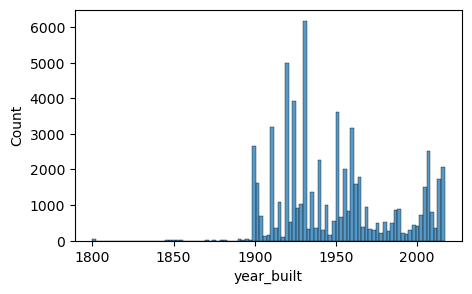

In [23]:
plt.figure(figsize=(5, 3))
sns.histplot(x="year_built", data=df)
plt.show()

### 커널 밀도 추정 플롯

커널 밀도 추정(Kernel Density Estimate, KDE) 플롯은 히스토그램과 비슷하게 `kdeplot()` 함수를 사용해 데이터가 어디에서 가장 많이 또는 어디에서 가장 적게 분포하는지에 대한 상위 수준의 모습을 보여 줍니다.

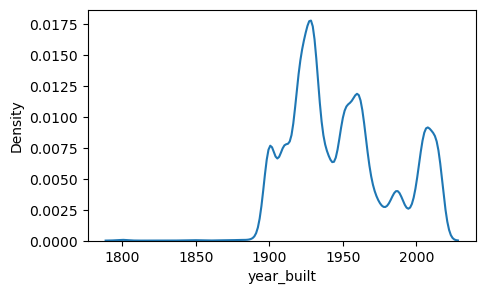

In [24]:
plt.figure(figsize=(5, 3))
sns.kdeplot(x="year_built", data=df)
plt.show()

### 박스플롯(Boxplot)

연속형 변수의 **중앙값(median)**과 **사분위 범위(interquartile range)**를 이해하고 싶다면 `boxplot()` 함수가 좋은 선택입니다. 이 함수는 histplot과 kdeplot과 설정 방식이 같아서, x와 data 인자만 지정해 주면 됩니다.

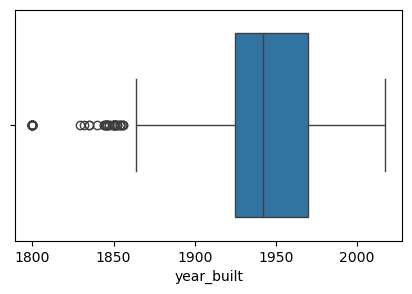

In [25]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="year_built", data=df)
plt.show()

### 바이올린 플롯(Violin Plot)

바이올린 플롯은 박스플롯(Boxplot)의 재미있는 변형입니다. 커널 밀도 추정(KDE)과 박스플롯 정보를 하나의 시각화 안에 결합해 보여 줍니다. 하얀 점은 중앙값(median)을, 검은 막대는 사분위 범위(interquartile range)를 나타냅니다. 바이올린 플롯의 외곽선은 커널 밀도 추정 곡선이며, 이를 통해 데이터의 전체적인 분포 형태를 파악할 수 있습니다.

> 바이올린 플롯이 정말 바이올린처럼 보이시나요? 단정하긴 어렵지만, 확실히 흥미롭게 보이긴 합니다.


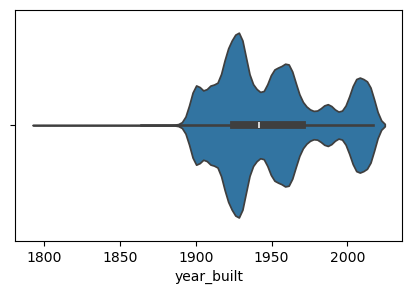

In [26]:
plt.figure(figsize=(5, 3))
sns.violinplot(x="year_built", data=df)
plt.show()

연속형 변수를 범주(카테고리)별로 나누어 보고 싶다면, x와 y 파라미터를 사용해서 각각 연속형 변수와 범주형 변수를 지정해 줄 수 있습니다.

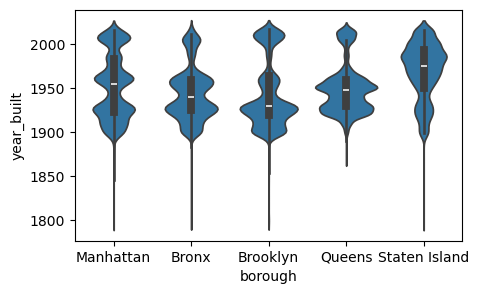

In [27]:
plt.figure(figsize=(5, 3))
sns.violinplot(x="borough", y="year_built", data=df)
plt.show()

## 범주형 데이터 그리기 (Plotting Categorical Data)

### 카운트플롯(Countplot)

데이터의 개수를 시각화하는 방법 중 하나는 카운트플롯(countplot)입니다. 다음과 같이 손쉽게 만들 수 있습니다.

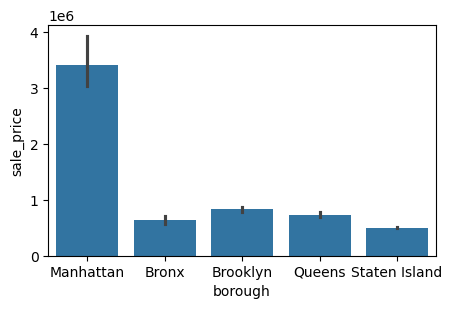

In [28]:
plt.figure(figsize=(5, 3))
sns.barplot(x="borough", y="sale_price", data=df)
plt.show()

### 수치형 데이터 그리기 (Plotting Numerical Data)

두 개의 연속형 변수 사이의 관계를 시각화하고 싶다고 가정해 보겠습니다. 이럴 때는 산점도(scatterplot)를 사용할 수 있습니다. `scatterplot()` 함수는 x와 y 파라미터가 필요합니다.
​
여기서는 연면적(gross_square_feet)과 판매 가격(sale_price)의 관계를 살펴보되, 판매 가격이 10억 달러 미만인 물건만 필터링해서 시각화해 보겠습니다.

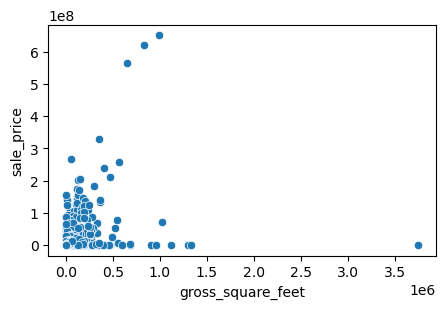

In [ ]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x="gross_square_feet", y="sale_price", data=df.filter(pl.col("sale_price") < 10**9))
plt.show()

### 시계열 데이터 그리기 (Plotting Time-series Data)

그래프를 그리기 전에 데이터를 집계(aggregate) 해야 하는 상황이 종종 있습니다. 예를 들어, 판매 날짜별로 판매된 부동산 수를 플롯하고 싶다면 특정 날짜에 대해 부동산 개수를 쉽게 가져올 수 있도록 데이터를 변환해야 합니다. 이제 시간에 따른 판매 건수 변화를 그려 보겠습니다. 이를 위해 데이터를 `sale_date`로 그룹화해 하루에 한 행씩만 갖도록 만들겠습니다.

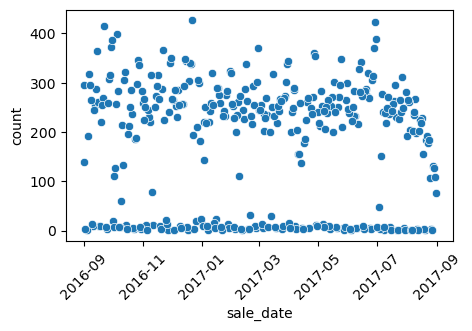

In [30]:
# 1) 날짜별 건수 집계
sale_date_count = (
    df.group_by("sale_date")
    .len()  # 각 그룹 길이
    .rename({"len": "count"})  # count 컬럼명으로 변경
)

# 2) sale_date를 datetime으로 캐스팅 (이미 datetime이면 생략 가능)
sale_date_count = sale_date_count.with_columns(
    pl.col("sale_date").cast(pl.Datetime)  # 또는 pl.Date
)

# 3) 시각화
plt.figure(figsize=(5, 3))
sns.scatterplot(
    x="sale_date",
    y="count",
    data=sale_date_count,
)
plt.xticks(rotation=45)
plt.show()

# 데이터 탐색 (Data Exploration)

데이터로부터 의미 있는 인사이트를 얻으려면 먼저 해당 데이터와 그것이 무엇을 나타내는지 충분히 이해하고 있어야 합니다. 그래서 탐색적 데이터 분석(Exploratory Data Analysis, EDA)은 데이터 사이언스 파이프라인에서 매우 중요한 단계입니다.

또한 데이터에 대담한 질문을 던지고 초기 가설을 시험해 보면서 창의성과 호기심이 필요한 아주 재미있는 과정이기도 합니다. 

탐색적 데이터 분석은 정해진 단계가 딱 정리된 형식적인 프로세스라기보다는 유연한 탐색 과정에 가깝습니다. 데이터를 탐색하다 보면 패턴을 발견하고, 이상치(outlier)를 감지하며, 처음 세웠던 가정이 여전히 유효한지 확인하게 됩니다.

이제 깨끗하게 정제된 데이터(CSV)와 데이터 시각화 도구(`seaborn`)을 갖추었으니, 본격적으로 데이터를 탐색해 봅시다! 🚀

In [31]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

df = pl.read_csv("../data/nyc_real_estate_cleaned.csv")

## 기술통계(Descriptive Statistics)

기술통계(descriptive statistics)는 통계적 방법을 사용해 데이터를 설명·요약하는 과정을 말합니다. 이를 통해 데이터의 분포가 어떤지, 그리고 이상치(outlier)가 존재하는지를 파악할 수 있습니다. EDA를 수행할 때는 데이터셋에 포함된 모든 변수들을 기술통계로 탐색해 보는 것이 좋습니다.
​
> ❗참고: 여기서 말하는 “변수(variable)”는 데이터프레임의 한 컬럼을 의미합니다.
​
기술통계를 어떻게 적용할지는 어떤 종류의 변수를 다루고 있는지에 따라 달라집니다.
​
### 변수의 종류(Types of Variables)

변수는 크게 두 가지 유형으로 나눌 수 있습니다.

1. 범주형(Categorical): 어떤 값이 몇 개의 범주(category) 중 하나로 저장될 수 있으면 범주형 변수입니다. 범주형 변수는 순서가 없는 명목형(nominal)과, 순서가 의미 있는 서열형(ordinal)으로 나눌 수 있습니다.
   * 명목형(Nominal): 논리적인 순서가 없음 (예: NYC 구 borough)
​   * 서열형(Ordinal): 정렬 가능한 데이터 (예: 1~10점 건물 안전 등급)
2. 수치형(Numerical): 어떤 값이 측정값을 의미하면 수치형 변수입니다. 수치형 변수는 이산형(discrete)과 연속형(continuous)으로 나눌 수 있습니다.
   * 이산형(Discrete): 개수를 셀 수 있는 값 (예: 임대 유닛 수)
​   * 연속형(Continuous): 이론적으로 무한한 값 범위를 가질 수 있음 (예: 건물 면적 square footage)

### 범주형 데이터 요약(Summarizing Categorical Data)

NYC 데이터프레임에는 다음과 같이 여러 개의 범주형 변수가 있습니다.
​
* borough
* neighborhood
* building_class_category
​

#### NYC 구(NYC Boroughs)

먼저 `borough` 컬럼을 살펴보면서 각 구에서 몇 개의 부동산이 거래되었는지 세어 보겠습니다. 이 작업을 가장 쉽게 하는 방법은 `.value_counts()`를 사용하는 것으로, 이름 그대로 데이터에서 각 값이 몇 번 등장하는지를 세어 줍니다.

In [32]:
borough_counts = df.select(pl.col("borough").value_counts())

print(borough_counts)

shape: (5, 1)
┌────────────────────────┐
│ borough                │
│ ---                    │
│ struct[2]              │
╞════════════════════════╡
│ {"Brooklyn",21864}     │
│ {"Bronx",6328}         │
│ {"Queens",17710}       │
│ {"Staten Island",5849} │
│ {"Manhattan",12844}    │
└────────────────────────┘


value_counts()의 출력은 항상 가장 많이 등장한 값부터 적게 등장한 값 순서로 정렬됩니다.
​
이를 통해 브루클린(Brooklyn)이 부동산 거래 건수가 가장 많고, 스태튼아일랜드(Staten Island)는 가장 적다는 것을 알 수 있습니다.
​
흥미롭게도, 브루클린의 거래 건수는 스태튼아일랜드보다 거의 4배나 많습니다. 🤯
​

또한 value_counts()에 normalize=True를 전달하면, 구별 부동산 거래 비율(%)도 구할 수 있습니다.
​
이 옵션을 사용하면 단순 건수(count) 가 아니라, 합이 1이 되는 비율(proportion) 로 변환된 값을 돌려줍니다.

In [33]:
borough_counts = (
    df.select(pl.col("borough").value_counts().alias("vc"))
    .unnest("vc")  # struct 컬럼 풀어서 borough, count 두 컬럼으로 만들기
    .with_columns((pl.col("count") / pl.col("count").sum()).alias("proportion"))
)

print(borough_counts)

shape: (5, 3)
┌───────────────┬───────┬────────────┐
│ borough       ┆ count ┆ proportion │
│ ---           ┆ ---   ┆ ---        │
│ str           ┆ u32   ┆ f64        │
╞═══════════════╪═══════╪════════════╡
│ Brooklyn      ┆ 21864 ┆ 0.338478   │
│ Queens        ┆ 17710 ┆ 0.27417    │
│ Bronx         ┆ 6328  ┆ 0.097964   │
│ Manhattan     ┆ 12844 ┆ 0.198839   │
│ Staten Island ┆ 5849  ┆ 0.090549   │
└───────────────┴───────┴────────────┘


브루클린은 뉴욕시 전체 부동산 거래의 약 34%를 차지하고 그 다음이 퀸즈 27%, 맨해튼 20% 순입니다. 반면 브롱크스에서는 약 10%, 스태튼아일랜드에서는 약 9%만 거래가 발생했습니다.

구별 데이터를 해석하는 또 다른 방법은 `seaborn`의 카운터플랏을 사용해 시각화하는 것입니다.​

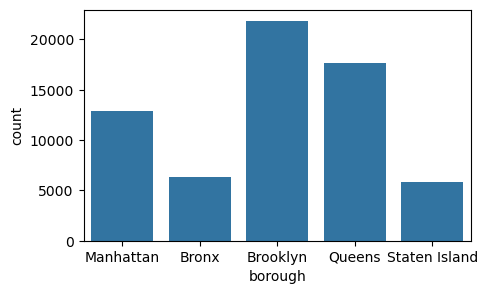

In [34]:
plt.figure(figsize=(5, 3))
sns.countplot(x="borough", data=df)
plt.show()

## Building Class Category

구(borough) 정보 외에도, 부동산의 건물 분류(building class category) 에 대한 데이터도 가지고 있습니다. 이 역시 충분히 탐색해 볼 만한 또 다른 범주형 변수입니다.
​
`borough` 에는 고유한 값이 5개뿐이지만 `building_class_category`는 값의 수가 훨씬 많습니다. 고유한 값의 개수는 `n_unique()` 함수를 사용해 셀 수 있습니다.

In [35]:
n_unique_building_class = df.select(pl.col("building_class_category").n_unique())

print(n_unique_building_class)

shape: (1, 1)
┌─────────────────────────┐
│ building_class_category │
│ ---                     │
│ u32                     │
╞═════════════════════════╡
│ 46                      │
└─────────────────────────┘


와, 건물 종류(building class)가 정말 많네요. 우리 데이터셋에 있는 뉴욕시 부동산들이 46개의 건물 분류에 고르게 분포되어 있을까요? 아니면 소수의 분류에 대부분 몰려 있을까요?
 
먼저, 가장 흔한 5개의 건물 분류를 한번 살펴봅시다.

In [36]:
top5_building_classes = (
    df.select(pl.col("building_class_category").value_counts().alias("vc"))
    .unnest("vc")  # -> columns: building_class_category, count
    .with_columns((pl.col("count") / pl.col("count").sum()).alias("proportion"))
    .sort("proportion", descending=True)
    .head(5)
)

print(top5_building_classes)

shape: (5, 3)
┌──────────────────────────────┬───────┬────────────┐
│ building_class_category      ┆ count ┆ proportion │
│ ---                          ┆ ---   ┆ ---        │
│ str                          ┆ u32   ┆ f64        │
╞══════════════════════════════╪═══════╪════════════╡
│ One family dwellings         ┆ 14459 ┆ 0.223841   │
│ Two family dwellings         ┆ 13088 ┆ 0.202616   │
│ Coops - elevator apartments  ┆ 11853 ┆ 0.183497   │
│ Condos - elevator apartments ┆ 8351  ┆ 0.129282   │
│ Three family dwellings       ┆ 3658  ┆ 0.05663    │
└──────────────────────────────┴───────┴────────────┘


결과를 통해 상당히 많은 비율의 부동산이 이 5개의 건물 분류 중 하나에 속하는 것처럼 보입니다. 위 결과에서 정확한 비율을 구해봅시다.

In [37]:
# df: Polars DataFrame 가정
top5_prop = (
    df.select(
        pl.col("building_class_category")
        .value_counts()  # struct: {building_class_category, count}
        .alias("vc")
    )
    .unnest("vc")  # -> columns: building_class_category, count
    .with_columns((pl.col("count") / pl.col("count").sum()).alias("proportion"))
    .sort("proportion", descending=True)
    .head(5)
    .select(pl.col("proportion").sum().alias("top5_proportion"))
)

print(top5_prop)

shape: (1, 1)
┌─────────────────┐
│ top5_proportion │
│ ---             │
│ f64             │
╞═════════════════╡
│ 0.795867        │
└─────────────────┘


위 결과를 통해 대략 79.5%의 뉴욕시 부동산이 상위 5개 건물 분류에 속한다는 사실을 알 수 있습니다. 실제 건물 분류 이름을 보면 이 결과가 꽤 그럴듯하다는 것을 알 수 있습니다.
​
* One family dwellings = 단독주택
* Two, Three family dwellings = 각각 듀플렉스, 트리플렉스 건물
* Coops/Condos = 임대 아파트 및 콘도

## 수치형 데이터 요약

수치형 데이터를 요약하는 방법에는 여러 가지가 있는데, 그중 대표적인 두 가지는 1) 중심 경향성을 측정하는 것과 2) 데이터의 산포도(퍼져 있는 정도) 를 측정하는 것입니다.
​
### 중심 경향성 측정

데이터의 중심 경향성(혹은 “가운데 값”)은 보통 평균(mean)과 중앙값(median)을 사용해 구할 수 있습니다. 수치형 변수의 평균(mean, 평균값) 을 계산하려면 값들의 합을 관측치 개수로 나누면 됩니다.

> 평균이 중앙값보다 크면, 데이터는 오른쪽으로 치우쳐(skewed to the right) 있습니다. 이는 값이 매우 큰 이상치(outlier)들이 평균 값을 위로 끌어올리고 있다는 뜻입니다. 반대로 중앙값이 평균보다 크면, 데이터는 왼쪽으로 치우쳐(skewed to the left) 있습니다. 이는 값이 매우 작은 이상치들이 평균 값을 아래로 끌어내리고 있다는 뜻입니다

### 분산(Spread) 측정하기

분산(spread, 또는 dispersion)은 수치형 변수를 요약할 때 사용할 수 있는 또 다른 유용한 척도입니다. 분산은 데이터셋에서 각 값들이 서로 얼마나 떨어져 있는지를 이해하는 데 도움을 줍니다. 표준편차(standard deviation)는 각 값이 평균으로부터 얼마나 떨어져 있는지를 나타내는 지표입니다. 데이터가 더 널리 퍼져 있을수록 표준편차는 더 커집니다.숫자 리스트의 표준편차는 `numpy`의 `std()` 메서드를 사용해서 계산할 수 있습니다.


In [38]:

print(df.select(pl.col("sale_price")).std())

shape: (1, 1)
┌────────────┐
│ sale_price │
│ ---        │
│ f64        │
╞════════════╡
│ 1.1661e7   │
└────────────┘


표준편차는 0보다 작을 수 없습니다. 표준편차가 0에 가까우면 값들이 평균 근처에 몰려 있다는 뜻이고, 표준편차가 정확히 0이면 모든 값이 평균과 동일하다는 뜻입니다.
​
###  퍼센타일(Percentiles)

데이터가 정규분포(평균 = 중앙값)를 따를 때는 표준편차가 분산을 측정하는 데 유용한 지표입니다. 하지만 데이터가 비대칭(skewed), 즉 정규분포가 아닐 경우에는 분위수(quantiles, percentiles)가 분산을 나타내는 더 좋은 척도입니다.
​
예를 들어 시험을 매우 잘 봐서 99번째 퍼센타일에 들었다면, 다른 응시자의 99%가 자신과 같거나 더 낮은 점수를 받았다는 의미로, 상위 1% 성적이라는 뜻입니다. 사분위수(quartiles) 는 데이터를 네 부분으로 나누는, 분산 측정에 자주 쓰이는 퍼센타일의 한 종류입니다.
​
* 1사분위수(Q1, 25번째 퍼센타일): 전체 값의 25%는 Q1보다 작고, 75%는 Q1보다 큽니다.
​* 2사분위수(Q2, 50번째 퍼센타일): 전체 값의 50%는 Q2보다 작고, 50%는 Q2보다 큽니다 (중앙값과 동일).
​* 3사분위수(Q3, 75번째 퍼센타일): 전체 값의 75%는 Q3보다 작고, 25%는 Q3보다 큽니다.
​
수치형 변수의 사분위수를 구할 때는 `quantile()` 메서드를 사용할 수 있습니다

In [39]:
q1 = df.select(pl.col("sale_price").quantile(0.25))

print(q1)

shape: (1, 1)
┌────────────┐
│ sale_price │
│ ---        │
│ f64        │
╞════════════╡
│ 237000.0   │
└────────────┘


다른 방법으로, 모든 사분위수를 요약하면서 동시에 평균, 표준편차, 최소값, 최대값까지 한 번에 보고 싶다면 `describe()` 함수를 사용할 수 있습니다.

In [40]:
df.describe()

statistic,borough,neighborhood,building_class_category,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,building_class_at_time_of_sale,sale_price,sale_date
str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,str
"""count""","""64595""","""64595""","""64595""","""64595""","""64595""","""64595""",64595.0,64595.0,64595.0,64595.0,45495.0,45336.0,64595.0,"""64595""",64595.0,"""64595"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,19100.0,19259.0,0.0,"""0""",0.0,"""0"""
"""mean""",null,null,null,null,null,null,10862.459153,2.008019,0.186454,2.211023,3435.388021,3903.138609,1949.529747,null,1.2634e6,null
"""std""",null,null,null,null,null,null,618.491884,15.098476,9.496642,17.942758,32232.44255,30384.575194,34.543645,null,1.1661e7,null
"""min""","""Bronx""","""Airport La Guardia""","""Asylums and homes""",""" ""","""1 12TH ST EXTENSION""",""" """,0.0,0.0,0.0,0.0,0.0,0.0,1800.0,"""A0""",0.0,"""2016-09-01T00:00:00.000000"""
"""25%""",null,null,null,null,null,null,10309.0,0.0,0.0,1.0,1600.0,1090.0,1925.0,null,237000.0,null
"""50%""",null,null,null,null,null,null,11210.0,1.0,0.0,1.0,2204.0,1720.0,1942.0,null,530000.0,null
"""75%""",null,null,null,null,null,null,11354.0,2.0,0.0,2.0,3150.0,2600.0,1970.0,null,936000.0,null
"""max""","""Staten Island""","""Wyckoff Heights""","""Warehouses""","""Z9""","""WHITTIER STREET""","""`""",11694.0,1844.0,2261.0,2261.0,4.2283e6,3.750565e6,2017.0,"""Z9""",2.2100e9,"""2017-08-31T00:00:00.000000"""


## 범주별 수치형 데이터 분할 (Segmenting Numerical Data by Category)

때때로 새로운 통찰을 얻기 위해 데이터를 여러 방식으로 분할(segmentation) 해서 보는 것이 유용합니다. 

지금까지 알아본 NYC 부동산 거래 데이터에서 구(borough), 건물 연식(신축 vs 구축), 건물 유형(단층 주택 vs 다층 아파트) 등으로 나누어 보면 어떨까요? 이렇게 나누었을 때, 각 세그먼트별 중앙값 판매 가격(median sale price) 에서 흥미로운 패턴이 보일 수도 있습니다.
​
전체 구를 통틀어 중앙값 판매 가격은 63만 달러였다는 것을 이미 보았습니다. 하지만 구마다 중앙값 판매 가격이 크게 다를 수도 있습니다. 그러니 이제 구별로 분할된 판매 가격을 분석하면서 세분화 연습을 해봅시다. 이런 세분화 작업에는 `groupby()` 함수가 매우 유용합니다.

In [ ]:
sale_price_borough = df.group_by("borough").agg(
    [
        pl.col("sale_price").median().alias("median"),
        pl.col("sale_price").mean().alias("mean"),
    ]
)

print(sale_price_borough)

shape: (5, 3)
┌───────────────┬───────────┬───────────────┐
│ borough       ┆ median    ┆ mean          │
│ ---           ┆ ---       ┆ ---           │
│ str           ┆ f64       ┆ f64           │
╞═══════════════╪═══════════╪═══════════════╡
│ Manhattan     ┆ 1110360.5 ┆ 3.4012e6      │
│ Staten Island ┆ 466326.0  ┆ 503555.582322 │
│ Queens        ┆ 496860.0  ┆ 728357.050649 │
│ Bronx         ┆ 310625.0  ┆ 632252.524652 │
│ Brooklyn      ┆ 425000.0  ┆ 826772.151436 │
└───────────────┴───────────┴───────────────┘


위 결과를 통해 구별로 중앙값 판매 가격(median sale price) 이 상당히 다르다는 것을 알 수 있습니다. 이제 중앙값 판매 가격이 가장 높은 구부터 낮은 구 순으로 데이터프레임의 순서를 다시 정렬해 봅시다. 이를 위해 `sort_values()` 함수를 사용합니다.

In [42]:
sale_price_borough_sorted = sale_price_borough.sort(
    "median",  # by='median'
    descending=True,
)

print(sale_price_borough_sorted)

shape: (5, 3)
┌───────────────┬───────────┬───────────────┐
│ borough       ┆ median    ┆ mean          │
│ ---           ┆ ---       ┆ ---           │
│ str           ┆ f64       ┆ f64           │
╞═══════════════╪═══════════╪═══════════════╡
│ Manhattan     ┆ 1110360.5 ┆ 3.4012e6      │
│ Queens        ┆ 496860.0  ┆ 728357.050649 │
│ Staten Island ┆ 466326.0  ┆ 503555.582322 │
│ Brooklyn      ┆ 425000.0  ┆ 826772.151436 │
│ Bronx         ┆ 310625.0  ┆ 632252.524652 │
└───────────────┴───────────┴───────────────┘


위의 데이터프레임을 보면 맨해튼이 단연코 가장 높은 중앙값 판매 가격을 가지며 브롱크스가 가장 낮은 중앙값 판매 가격을 가진다는 것을 알 수 있습니다. 플랏을 그려 보죠.

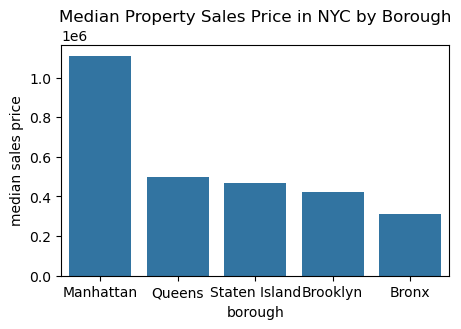

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x="borough", y="median", data=sale_price_borough.sort("median", descending=True))
plt.title("Median Property Sales Price in NYC by Borough")
plt.ylabel("median sales price")
plt.show()

시각화를 하면 훨씬 보기 좋습니다! 특히나 정렬되어 있는 막대를 통해 어떤 구의 중앙값 판매 가격이 가장 높고 낮은지 훨씬 더 쉽게 파악할 수 있습니다. 

새로 만든 데이터프레임에서는 구별로 중앙값과 평균 판매 가격을 계산했는데 이제 이 두 지표를 나란히 비교해서 차이가 있는지 확인해 봅시다.

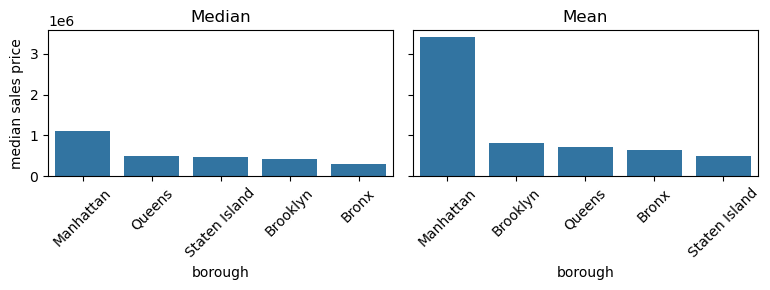

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

sns.barplot(
    x="borough",
    y="median",
    data=sale_price_borough.sort("median", descending=True),
    ax=axes[0],
)
axes[0].set_ylabel("median sales price")
axes[0].set_title("Median")
axes[0].tick_params(axis="x", rotation=45)

sns.barplot(
    x="borough",
    y="mean",
    data=sale_price_borough.sort("mean", descending=True),
    ax=axes,
)
axes.set_ylabel("mean sales price")
axes.set_title("Mean")
axes.tick_params(axis="x", rotation=45)

fig.tight_layout()
plt.show()

위의 평균과 중앙값 막대 그래프를 보면, 맨해튼에는 아주 비싼 부동산 거래가 있어서 평균 판매 가격을 끌어올리고 있다는 것을 알 수 있습니다. 반면 브롱크스는 중앙값 판매 가격이 가장 낮지만, 실제로는 평균 판매 가격이 세 번째로 높습니다.
​
이는 브롱크스에 값이 매우 싼 부동산이 많이 있는 동시에, 평균 집값을 그렇게 싸지만은 않게 만들어 버리는 큰 이상치(outlier)들이 존재한다는 뜻입니다.

### 구별 준공연도(Year Built) 세분화

구 단위 세분화는 계속 활용하면서, 다른 부동산 특성도 함께 탐색해 볼 수 있습니다. 예를 들어, 구별 주택의 평균 연식을 살펴보는 것도 흥미로운 분석입니다. 브롱크스의 집들이 스태튼아일랜드보다 더 오래되었을까요? 이런 질문에 답하기 위해 구를 기준으로 데이터를 그룹화한 뒤 `year_built` 에 대한 기술통계를 계산합니다.

In [45]:
df.group_by("borough").agg(
    pl.col("year_built").mean().alias("mean"),
    pl.col("year_built").median().alias("median"),
    pl.col("year_built").min().alias("min"),
    pl.col("year_built").max().alias("max"),
)

borough,mean,median,min,max
str,f64,f64,i64,i64
"""Bronx""",1944.618679,1940.0,1800,2017
"""Queens""",1949.380858,1948.0,1870,2017
"""Staten Island""",1970.025474,1975.0,1800,2016
"""Manhattan""",1952.541187,1955.0,1800,2016
"""Brooklyn""",1943.819704,1930.0,1800,2017


위 결과를 통해 브루클린의 주택 중간 연식이 스태튼아일랜드보다 더 오래되었다는 것을 알 수 있습니다. 이제 각 구별로 `year_built` 속성의 분포를 그려보겠습니다. 먼저 해야 할 일은 구들의 목록을 만들어, 각 구에 대해 개별 분포 플롯을 생성하는 반복문을 돌려야 합니다. 고유한 구의 이름은 `unique()` 함수를 사용해 얻을 수 있습니다.

In [46]:
boroughs = df.select(pl.col("borough").unique())["borough"].to_list()
boroughs

['Queens', 'Staten Island', 'Brooklyn', 'Bronx', 'Manhattan']

이제 순환문을 사용해 플랏을 그려봅니다.

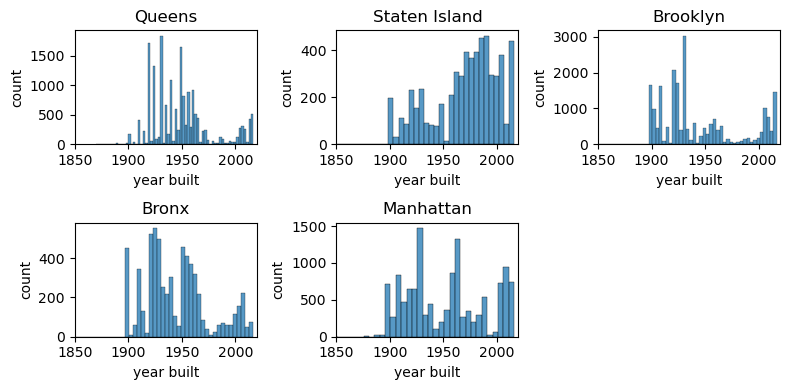

In [47]:
plt.figure(figsize=(8, 4))
for i, borough in enumerate(boroughs):
    plt.subplot(2, 3, i + 1)
    sns.histplot(x="year_built", data=df.filter(pl.col("borough") == borough))
    plt.ylabel("count")
    plt.xlabel("year built")
    plt.title(borough)
    plt.xlim([1850, 2020])

plt.tight_layout()

### Datetime 데이터 다루기

파이썬에는 시계열 데이터를 표현할 수 있는 내장 `datetime` 데이터 타입이 있습니다.`to_datetime()` 함수를 사용해 필요한 열의 데이터를 `datetime` 타입으로 변환할 수 있습니다. 먼저 데이터 변환을 한 뒤에 시계열 그래프를 그려보겠습니다.

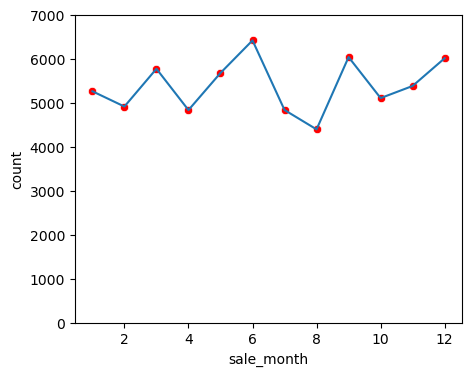

In [48]:
# 1) 문자열 → Datetime 변환 (단 한 번만!)
df = df.with_columns(pl.col("sale_date").str.strptime(pl.Datetime, strict=False))

# 2) month / year / weekday 컬럼 생성
df = df.with_columns(
    [
        pl.col("sale_date").dt.month().alias("sale_month"),
        pl.col("sale_date").dt.year().alias("sale_year"),
        pl.col("sale_date").dt.weekday().alias("sale_weekday"),
    ]
)

# 3) 월별 건수 집계
agg_sale_month = df.group_by("sale_month").len().rename({"len": "count"})

# 4) 시각화를 위해 Pandas로 변환 후 그리기
agg_sale_month_pd = agg_sale_month.to_pandas()

plt.figure(figsize=(5, 4))
sns.lineplot(x="sale_month", y="count", data=agg_sale_month_pd)
sns.scatterplot(x="sale_month", y="count", data=agg_sale_month_pd, color="red")
plt.ylim([0, 7000])
plt.show()

위 플랏을 통해 뉴욕시에서 부동산을 매매하기에 가장 인기 있는 달은 6월이고 가장 인기가 없는 달은 8월이라는 걸 손쉽게 알 수 있습니다. 이제 요일별로 나눠 본 부동산 거래 추세를 살펴보겠습니다. `group_by`를 사용해 다음과 같이 만들 수 있습니다.

In [49]:
agg_sale_weekday = df.group_by("sale_weekday").len().rename({"len": "count"})

agg_sale_weekday

sale_weekday,count
i8,u32
6,430
5,12744
3,13121
4,15282
2,12309
1,10521
7,188


In [ ]:
agg_sale_weekday = df.group_by("sale_weekday").len().rename({"len": "count"})

weekday_values = {
    "1": "Mon",
    "2": "Tues",
    "3": "Wed",
    "4": "Thurs",
    "5": "Fri",
    "6": "Sat",
    "7": "Sun",
}

# 컬럼 형변환 후 값을 교체합니다.
agg_sale_weekday = agg_sale_weekday.with_columns(
    pl.col("sale_weekday").cast(pl.String).replace(weekday_values)
)

agg_sale_weekday

sale_weekday,count
str,u32
"""Mon""",10521
"""Tues""",12309
"""Thurs""",15282
"""Fri""",12744
"""Wed""",13121
"""Sat""",430
"""Sun""",188


`sale_weekday` 열을 만들어보니 훨씬 보기 좋아졌습니다. 이제 바플랏을 그려서 시각화해봅니다.

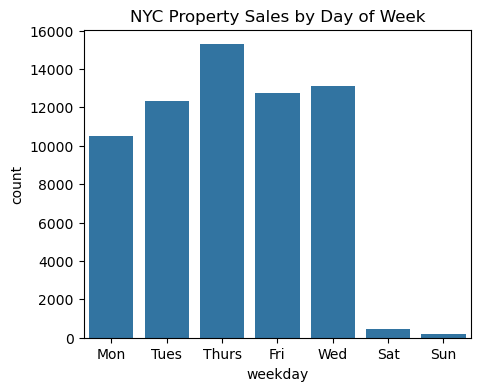

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(x="sale_weekday", y="count", data=agg_sale_weekday)
plt.xlabel("weekday")
plt.title("NYC Property Sales by Day of Week")
plt.show()

결과가 흥미롭습니다. 데이터에 의하면 목요일이 부동산을 판매하기에 가장 인기 있는 요일이라는 것을 알 수 있습니다. 그리고 주말인 토요일과 일요일에는 거래가 거의 이루어지지 않다는 것도 볼 수 있죠.

# 마치며

이번 글에서는 `polars`와 `seaborn`을 이용해 간단한 데이터 분석과 시각화를 체험해보았습니다. `polars`의 속도와 효율성, 그리고 `seaborn`의 직관적인 그래프 표현 덕분에 데이터 과학의 핵심 개념을 한눈에 살펴볼 수 있었죠. 
앞으로는 더 복잡한 데이터셋을 다루거나, 머신러닝 모델과 결합해 분석을 확장해보는 것도 좋을 것 같습니다. 데이터 과학은 결국 '데이터를 통해 통찰을 얻는 과정'이니까요. 오늘의 이 글이 여러분께 그 첫걸음이 되었길 바랍니다😊.

# 참조

- 이 글에 사용된 원본 코드의 출처: https://www.practicalpythonfordatascience.com
